In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exit_age = pd.read_csv('../data/Exit_Age.csv')
instrument_diff = pd.read_csv('../data/Instrument_Diff.csv')
length_of_exit = pd.read_csv('../data/Length_of_Exit.csv')
point_of_entry = pd.read_csv('../data/Point_of_Entry.csv')
time_bet_assessments = pd.read_csv('../data/Time_Bet_Assessments.csv')
time_in_program = pd.read_csv('../data/Time_in_Program.csv')


In [3]:
exit_age.columns = exit_age.columns.str.strip()
exit_age.columns = exit_age.columns.str.replace(' ', '', regex=True)
exit_age.head()

,Unnamed:0,CHILD_ID,AgeuponExit(years),AgeuponExit(years)alt
0,3215,526656,6.0,3.8
1,2379,518335,5.9,3.5
2,3702,529724,5.7,3.7
3,3754,530025,5.6,3.5
4,4694,535019,5.6,3.8


In [4]:
instrument_diff.head()

,Unnamed: 0,pca_bdi2_tot,pca_bdi3_tot,pca_tot,bdi2_perc,bdi3_perc
0,0,66,71,137,48.18,51.82


In [5]:

exit_age.columns = ["Index", "Child_ID", "Exit_Age", "Exit_Age_Alt"]


exit_age["Exit_Age"] = pd.to_numeric(exit_age["Exit_Age"], errors='coerce')
exit_age["Exit_Age_Alt"] = pd.to_numeric(exit_age["Exit_Age_Alt"], errors='coerce')


df_cleaned = exit_age.dropna(subset=["Exit_Age", "Exit_Age_Alt"])


age_distribution_stats = df_cleaned[["Exit_Age", "Exit_Age_Alt"]].describe()





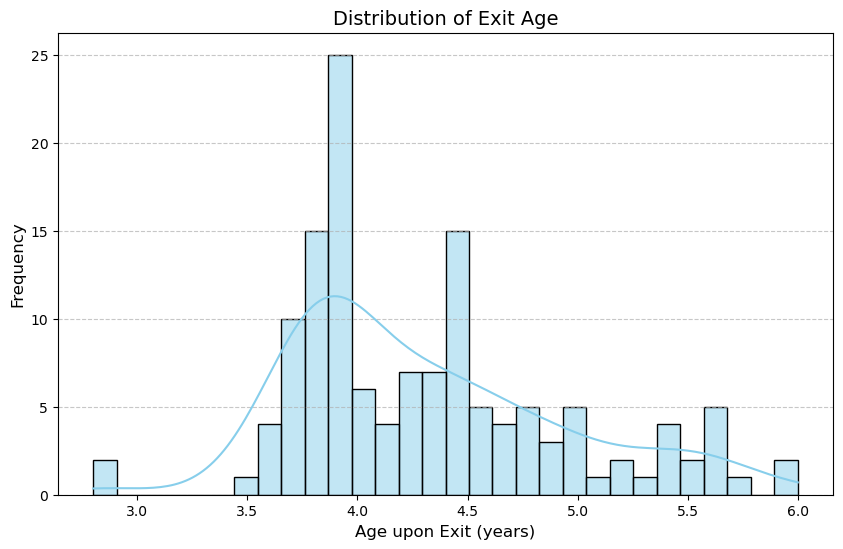

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Exit_Age"], bins=30, kde=True, color="skyblue", edgecolor="black")


plt.title("Distribution of Exit Age", fontsize=14)
plt.xlabel("Age upon Exit (years)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

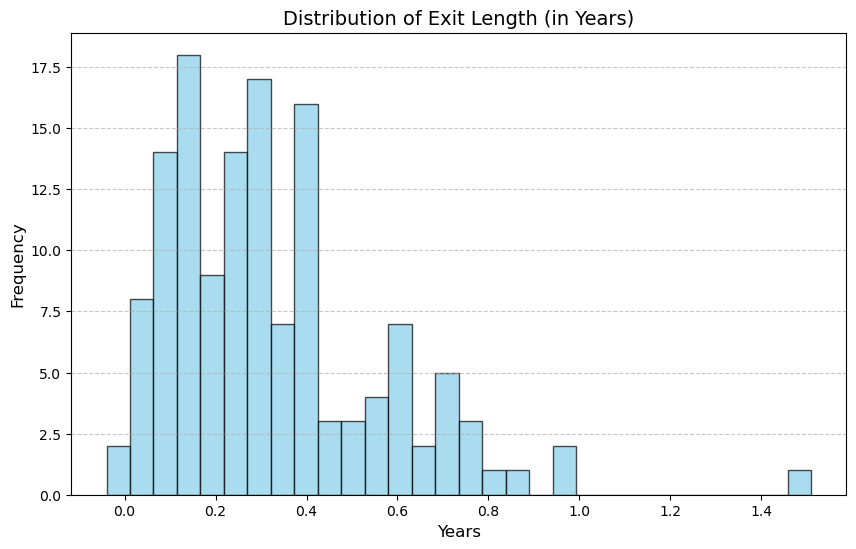

In [7]:

length_of_exit.columns = ["Index", "Child_ID", "Exit_Length"]



length_of_exit["Exit_Length"] = length_of_exit["Exit_Length"].str.replace(" days", "").astype(float)


length_of_exit["Exit_Length_Years"] = (length_of_exit["Exit_Length"] / 365).round(2)
length_of_exit["Exit_Length_Months"] = (length_of_exit["Exit_Length"] / 30.44).round(2)  


plt.figure(figsize=(10, 6))
length_of_exit["Exit_Length_Years"].plot(kind='hist', bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Exit Length (in Years)", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



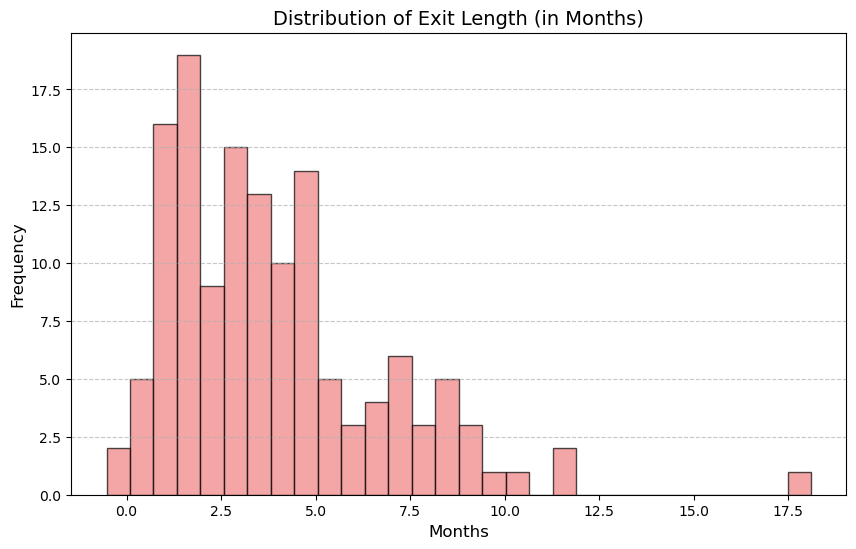

In [8]:
# Plot for the month 
plt.figure(figsize=(10, 6))
length_of_exit["Exit_Length_Months"].plot(kind='hist', bins=30, color="lightcoral", edgecolor="black", alpha=0.7)
plt.title("Distribution of Exit Length (in Months)", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
point_of_entry.head()

,Unnamed: 0,DISTRICT,count
0,0,MD,33
1,1,GN,27
2,2,SC,22
3,3,ET,17
4,4,UC,12


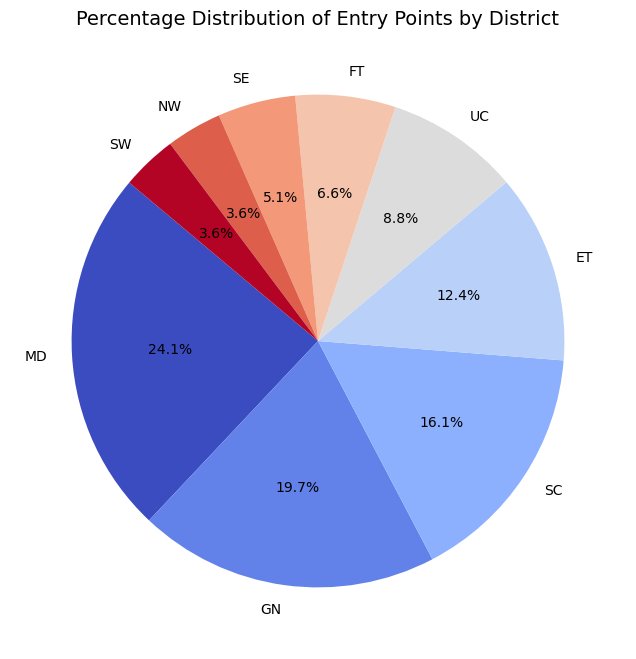

In [10]:

point_of_entry.set_index("DISTRICT")["count"].plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), cmap="coolwarm", startangle=140)
plt.title("Percentage Distribution of Entry Points by District", fontsize=14)
plt.ylabel("")
plt.show()

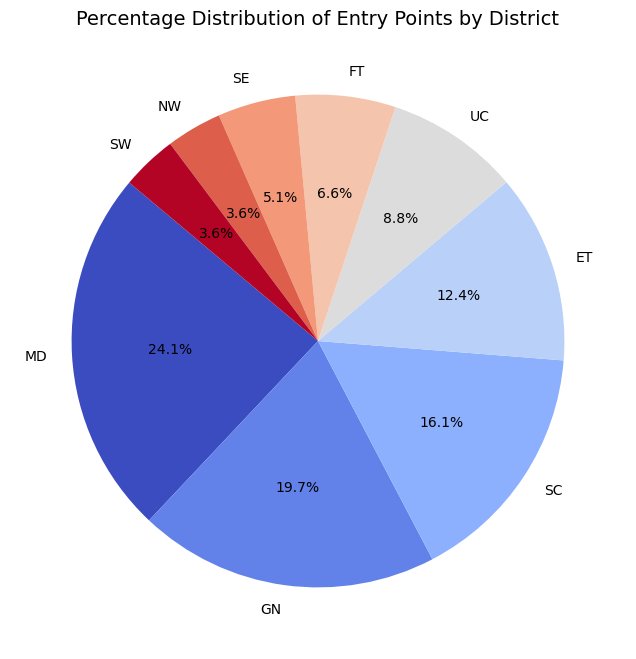

In [11]:

point_of_entry.set_index("DISTRICT")["count"].plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), cmap="coolwarm", startangle=140)
plt.title("Percentage Distribution of Entry Points by District", fontsize=14)
plt.ylabel("")
plt.show()

In [12]:

time_bet_assessments.head()

,Unnamed: 0,CHILD_ID,length_between_assessment
0,356,492996.0,787 days
1,2351,517957.0,685 days
2,2851,523762.0,677 days
3,3215,526656.0,668 days
4,2379,518335.0,657 days


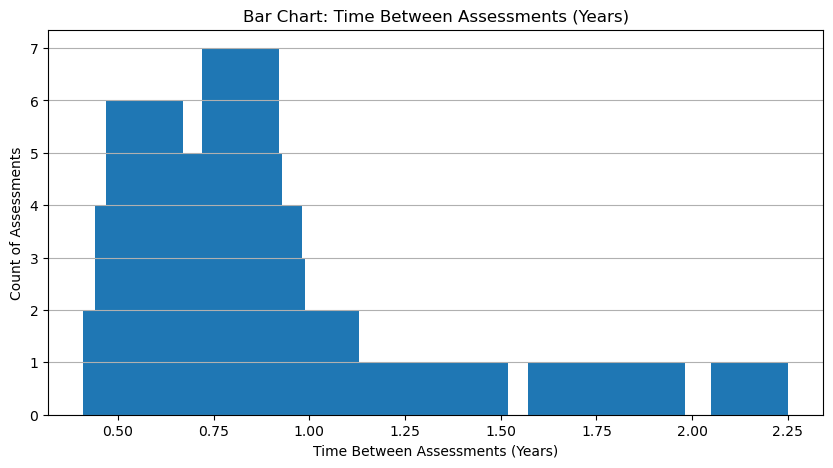

In [13]:

time_bet_assessments['length_between_assessment'] = time_bet_assessments['length_between_assessment'].str.replace(" days", "").astype(int)


time_bet_assessments['years'] = (time_bet_assessments['length_between_assessment'] / 365.25).round(2)


df_grouped_years = time_bet_assessments.groupby('years').size().reset_index(name='count')


plt.figure(figsize=(10, 5))
plt.bar(df_grouped_years['years'], df_grouped_years['count'], width=0.2)
plt.xlabel("Time Between Assessments (Years)")
plt.ylabel("Count of Assessments")
plt.title("Bar Chart: Time Between Assessments (Years)")
plt.grid(axis='y')
plt.show()

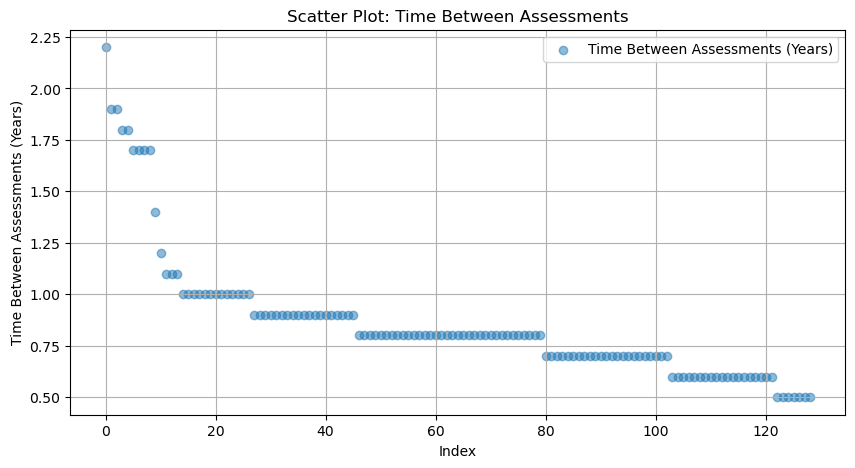

In [14]:
time_bet_assessments['length_between_assessment'] = time_bet_assessments['length_between_assessment'].astype(str)
time_bet_assessments['length_between_assessment'] = time_bet_assessments['length_between_assessment'].str.replace(" days", "").astype(int)


time_bet_assessments['years'] = (time_bet_assessments['length_between_assessment'] / 365.25).round(1)


plt.figure(figsize=(10, 5))
plt.scatter(time_bet_assessments.index, time_bet_assessments['years'], alpha=0.5, label="Time Between Assessments (Years)")
plt.xlabel("Index")
plt.ylabel("Time Between Assessments (Years)")
plt.title("Scatter Plot: Time Between Assessments")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
time_in_program.head()

,Unnamed: 0,CHILD_ID,Days btw Initial and Exit
0,2379,518335,887
1,3215,526656,806
2,2990,524961,797
3,3754,530025,769
4,3475,528266,753


In [16]:
time_in_program.info



<bound method DataFrame.info of      Unnamed: 0  CHILD_ID  Days btw Initial and Exit
0          2379    518335                        887
1          3215    526656                        806
2          2990    524961                        797
3          3754    530025                        769
4          3475    528266                        753
..          ...       ...                        ...
131        6593    548302                        221
132        6450    547077                        216
133        6891    551017                        208
134         889    500338                        182
135        6259    545354                        182

[136 rows x 3 columns]>

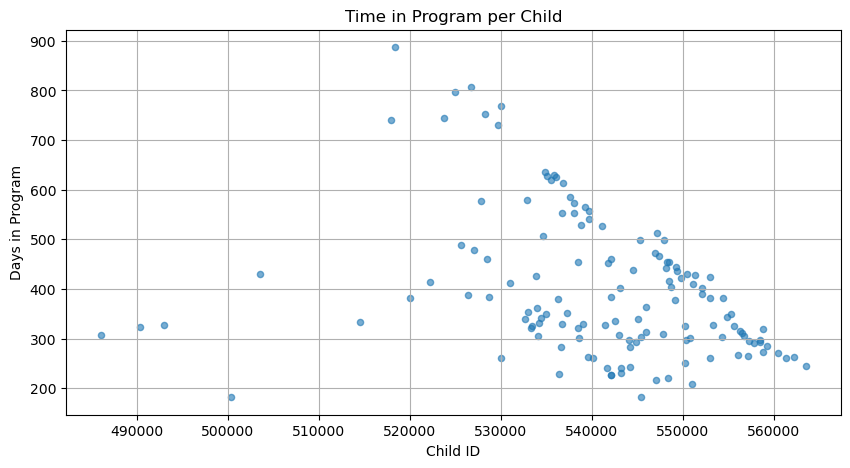

In [17]:
time_in_program.plot.scatter(x="CHILD_ID", y="Days btw Initial and Exit", alpha=0.6, figsize=(10, 5))

plt.xlabel("Child ID")
plt.ylabel("Days in Program")
plt.title("Time in Program per Child")
plt.grid(True)
plt.show()

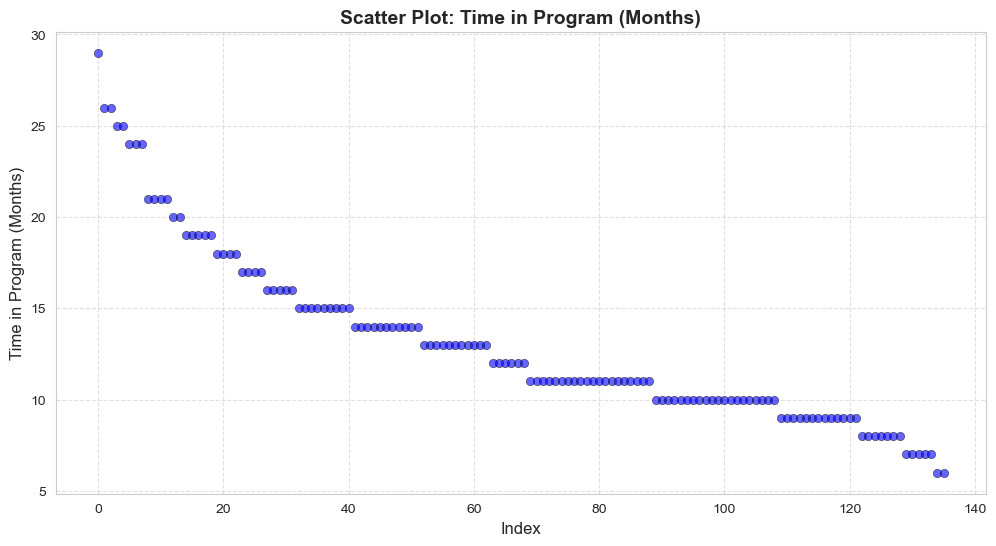

In [18]:
time_in_program.rename(columns={"Days btw Initial and Exit": "days_between"}, inplace=True)


time_in_program['total_months'] = (time_in_program['days_between'] / 30.44).round(0).astype(int)

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.scatterplot(x=time_in_program.index, y=time_in_program['total_months'], color='blue', alpha=0.6, edgecolor='black')

plt.xlabel("Index", fontsize=12)
plt.ylabel("Time in Program (Months)", fontsize=12)
plt.title("Scatter Plot: Time in Program (Months)", fontsize=14, fontweight='bold')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

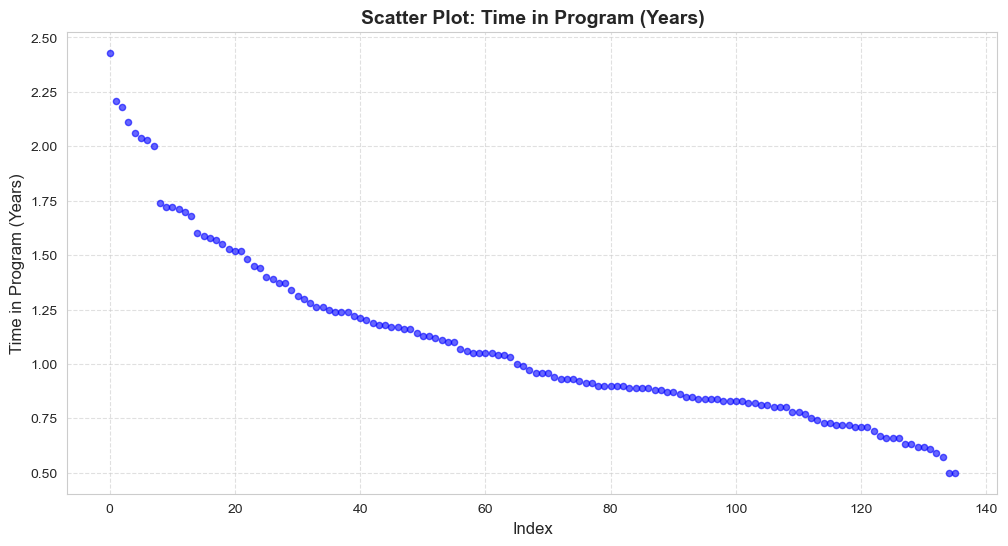

In [19]:
time_in_program.rename(columns={"Days btw Initial and Exit": "days_between"}, inplace=True)


time_in_program['total_years'] = (time_in_program['days_between'] / 365.25).round(2)
time_in_program['index_col'] = time_in_program.index


time_in_program.plot.scatter(x='index_col', y='total_years', figsize=(12, 6), color='blue', alpha=0.6)


plt.xlabel("Index", fontsize=12)
plt.ylabel("Time in Program (Years)", fontsize=12)
plt.title("Scatter Plot: Time in Program (Years)", fontsize=14, fontweight='bold')


plt.grid(True, linestyle='--', alpha=0.6)

plt.show()